# Universidad Central de Venezuela - 6213 - Minería de datos

# Quiz/Asignación 2

## Diego Perdomo - 30719573

Empecemos por importar nuestro [dataset](https://www.kaggle.com/datasets/datasnaek/youtube-new/data) directo desde Kaggle:

In [ ]:
import kagglehub
from kagglehub import KaggleDatasetAdapter
import pandas as pd # Import pandas explicitly

file_path = "USvideos.csv"

# Load the latest version
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "datasnaek/youtube-new",
  file_path,
)

# Display DataFrame information using pandas

Using Colab cache for faster access to the 'youtube-new' dataset.


## Descripción de los datos

Estamos trabajando con un repositorio que recopila los 200  videos más populares de cada día dentro de YouTube entorno al año 2018. La información detallada se expone a continuación

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                40949 non-null  object
 1   trending_date           40949 non-null  object
 2   title                   40949 non-null  object
 3   channel_title           40949 non-null  object
 4   category_id             40949 non-null  int64 
 5   publish_time            40949 non-null  object
 6   tags                    40949 non-null  object
 7   views                   40949 non-null  int64 
 8   likes                   40949 non-null  int64 
 9   dislikes                40949 non-null  int64 
 10  comment_count           40949 non-null  int64 
 11  thumbnail_link          40949 non-null  object
 12  comments_disabled       40949 non-null  bool  
 13  ratings_disabled        40949 non-null  bool  
 14  video_error_or_removed  40949 non-null  bool  
 15  de

Con 4.2 MB, más de 40 mil entradas y 16 columnas, el repositorio almacena tanto datos cuantitativos como los likes, vistas (int64) y fechas (object), si el video tiene las calificaciones o comentarios desactivados así como si fue borrado (bool) y valores descriptivos como el nombre del título, del canal, su identificador, descripción entre otros (object). Todos los anteriores y los demás mencionados en la información impresa más arriba. En síntesis tiene

*   3 Variables booleanas
*   5 Int64 (Numéricas)
*   8 object (Fechas y Strings)

## Preprocesamiento

Ya que sabemos que los valores numéricos y booleanos correspondientes a las columnas están bien asignados, realicemos una limpieza sobre los valores nulos e interpolemos donde sea posible.

In [ ]:
# @title
null_values_count = df.isnull().sum()
print('Number of null values per variable:')
print(null_values_count)

Number of null values per variable:
video_id                    0
trending_date               0
title                       0
channel_title               0
category_id                 0
publish_time                0
tags                        0
views                       0
likes                       0
dislikes                    0
comment_count               0
thumbnail_link              0
comments_disabled           0
ratings_disabled            0
video_error_or_removed      0
description               570
dtype: int64


¡Vaya! Parece que no tenemos valores nulos a excepción de las descripciones, pero estas sabemos que por el funcionamiento de YouTube pueden dejarse vacías sin inconvenientes. Los datos no contienen por lo tanto valores faltantes que incomoden nuestra exploración.

## Estadísticas descriptivas

Analicemos las variables numéricas presentes y hagamos un reporte con sus estadísticos principales.

In [ ]:
# @title
import pandas as pd

numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Calculate each statistic for the numeric columns
means = df[numeric_cols].mean()
medians = df[numeric_cols].median()
variances = df[numeric_cols].var()
stds = df[numeric_cols].std()
mins = df[numeric_cols].min()
maxs = df[numeric_cols].max()

# Combine all statistics into a single DataFrame
descriptive_statistics_df = pd.DataFrame({
    'Mean': means,
    'Median': medians,
    'Variance': variances,
    'Standard Deviation': stds,
    'Min': mins,
    'Max': maxs
})

display(descriptive_statistics_df.style.format({'Mean': '{:,.0f}', 'Median': '{:,.0f}', 'Variance': '{:,.2f}', 'Standard Deviation': '{:,.2f}'}))

,Mean,Median,Variance,Standard Deviation,Min,Max
category_id,20,24,57.28,7.57,1,43
views,"2,360,785","681,861","54,672,918,291,443.21","7,394,113.76",549,225211923
likes,"74,267","18,091","52,388,498,047.28","228,885.34",0,5613827
dislikes,"3,711",631,"842,723,827.25","29,029.71",0,1674420
comment_count,"8,447","1,856","1,401,041,356.64","37,430.49",0,1361580


### Vistas
Encontramos que el promedio de vistas ronda los 2.3 Millones, pero está muy lejos del punto medio de 681 mil. Seguramente se debe a que hay una diferencia muy alta entre los puestos superiores de la lista de trendings vs los inferiores. Esto se refleja en la desviación estándar así como en el nñumero de vistas del video con menos reproducciones. De aquí se nos da a entender que YouTube no siempre posiciona en la lista de trending a los videos con más crecimiento y en cambio tendrá otros criterios. Por ejemplo en el caso del video con menos visualizaciones,se trata de una noticia de un suceso violento en EU:

In [ ]:
video_id_to_find = 'y6KYFcta4SE'
first_entry = df[df['video_id'] == video_id_to_find].iloc[0]
print(first_entry)

video_id                                                        y6KYFcta4SE
trending_date                                                      18.26.01
title                      1 dead, others injured after Ky. school shooting
channel_title                                                         Newsy
category_id                                                              25
publish_time                                       2018-01-23T15:30:01.000Z
tags                      shooting|"kentucky"|"breaking news"|"u.s. news...
views                                                                   549
likes                                                                     9
dislikes                                                                  0
comment_count                                                             5
thumbnail_link               https://i.ytimg.com/vi/y6KYFcta4SE/default.jpg
comments_disabled                                                     False
ratings_disa

###Ratings
Respecto a los otros datos, puesto que los creadores pueden elegir restringir los likes, dislikes y comentarios, la data presentada incluye un número significativo de valores nulos en estas variables por lo que su mínimo es 0. Podemos restringir nuestra búsqueda a aquellos con valores mayores a cero y ver cómo se mueve la mediana y media:

In [ ]:
# @title
# Filter the DataFrame to include only rows where likes, dislikes, and comment_count are greater than 0
df_filtered_engagement = df[(df['likes'] > 0) & (df['dislikes'] > 0) & (df['comment_count'] > 0)]

# Select the relevant numeric columns for engagement
engagement_cols = ['likes', 'dislikes', 'comment_count']

# Calculate each statistic for the filtered engagement columns
means_filtered = df_filtered_engagement[engagement_cols].mean()
medians_filtered = df_filtered_engagement[engagement_cols].median()
variances_filtered = df_filtered_engagement[engagement_cols].var()
stds_filtered = df_filtered_engagement[engagement_cols].std()
mins_filtered = df_filtered_engagement[engagement_cols].min()
maxs_filtered = df_filtered_engagement[engagement_cols].max()

# Combine all statistics into a single DataFrame
descriptive_statistics_filtered_df = pd.DataFrame({
    'Mean': means_filtered,
    'Median': medians_filtered,
    'Variance': variances_filtered,
    'Standard Deviation': stds_filtered,
    'Min': mins_filtered,
    'Max': maxs_filtered
})

# Display the resulting DataFrame with 'Mean' formatted without scientific notation and other columns formatted as before
display(descriptive_statistics_filtered_df.style.format({'Mean': '{:,.0f}', 'Median': '{:,.0f}', 'Variance': '{:,.2f}', 'Standard Deviation': '{:,.2f}'}))

,Mean,Median,Variance,Standard Deviation,Min,Max
likes,"75,677","18,576","53,518,867,967.95","231,341.45",1,5613827
dislikes,"3,757",644,"861,677,152.83","29,354.34",1,1674420
comment_count,"8,645","1,947","1,432,471,921.88","37,848.01",1,1361580


Aún con el filtrado anterior existe una amplísima varianza dentro de cada uno como se refleja en sus estadísticos, aunque sí podemos ver un aumento en el promedio y la mediana tras ignorar los valores nulos.

###Categorías
Naturalmente del paso anterior sobre category_id sólo nos interesa saber que tiene de 1 a 43 distintas categorías pues el resto de estadísticos no aportan más información, sin embargo sería interesante saber qué categorías son las más populares. Los valores son referencias o identificadores para los nombres de cada categoría, pero en [MixeDanalytics](https://mixedanalytics.com/blog/list-of-youtube-video-category-ids/) se ofrece el listado de categorías con id y nombre extraido directo de la api de YouTube. Usando estos datos y haciendo la relación entre ambos tenemos el siguiente gráfico:

In [ ]:
# @title
category_id_to_name = {
    1: 'Film & Animation',
    2: 'Autos & Vehicles',
    10: 'Music',
    15: 'Pets & Animals',
    17: 'Sports',
    18: 'Short Movies',
    19: 'Travel & Events',
    20: 'Gaming',
    21: 'Videoblogging',
    22: 'People & Blogs',
    23: 'Comedy',
    24: 'Entertainment',
    25: 'News & Politics',
    26: 'Howto & Style',
    27: 'Education',
    28: 'Science & Technology',
    29: 'Nonprofits & Activism',
    30: 'Movies',
    31: 'Anime/Animation',
    32: 'Action/Adventure',
    33: 'Classics',
    34: 'Comedy',
    35: 'Documentary',
    36: 'Drama',
    37: 'Family',
    38: 'Foreign',
    39: 'Horror',
    40: 'Sci-Fi/Fantasy',
    41: 'Thriller',
    42: 'Shorts',
    43: 'Shows',
    44: 'Trailers'
}

print(category_id_to_name)

{1: 'Film & Animation', 2: 'Autos & Vehicles', 10: 'Music', 15: 'Pets & Animals', 17: 'Sports', 18: 'Short Movies', 19: 'Travel & Events', 20: 'Gaming', 21: 'Videoblogging', 22: 'People & Blogs', 23: 'Comedy', 24: 'Entertainment', 25: 'News & Politics', 26: 'Howto & Style', 27: 'Education', 28: 'Science & Technology', 29: 'Nonprofits & Activism', 30: 'Movies', 31: 'Anime/Animation', 32: 'Action/Adventure', 33: 'Classics', 34: 'Comedy', 35: 'Documentary', 36: 'Drama', 37: 'Family', 38: 'Foreign', 39: 'Horror', 40: 'Sci-Fi/Fantasy', 41: 'Thriller', 42: 'Shorts', 43: 'Shows', 44: 'Trailers'}


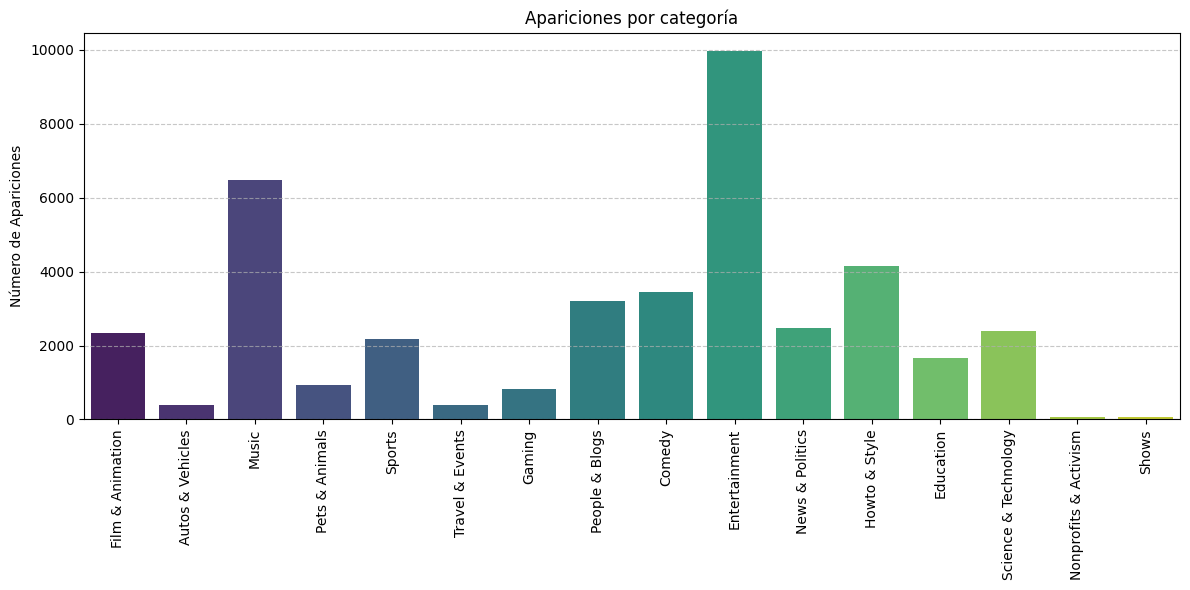

In [ ]:
# @title
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the frequency of each category_id
category_counts = df['category_id'].value_counts().sort_index()

# Map category IDs to names for plotting
category_names = [category_id_to_name.get(cid, f'Unknown Category {cid}') for cid in category_counts.index]

# Create a bar plot (histogram for categorical data)
plt.figure(figsize=(12, 6))
sns.barplot(x=category_names, y=category_counts.values, palette='viridis', hue=category_names, legend=False)
plt.title('Apariciones por categoría')
plt.ylabel('Número de Apariciones')
plt.xticks(rotation=90) # Rotate x-axis labels for better readability if many categories
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

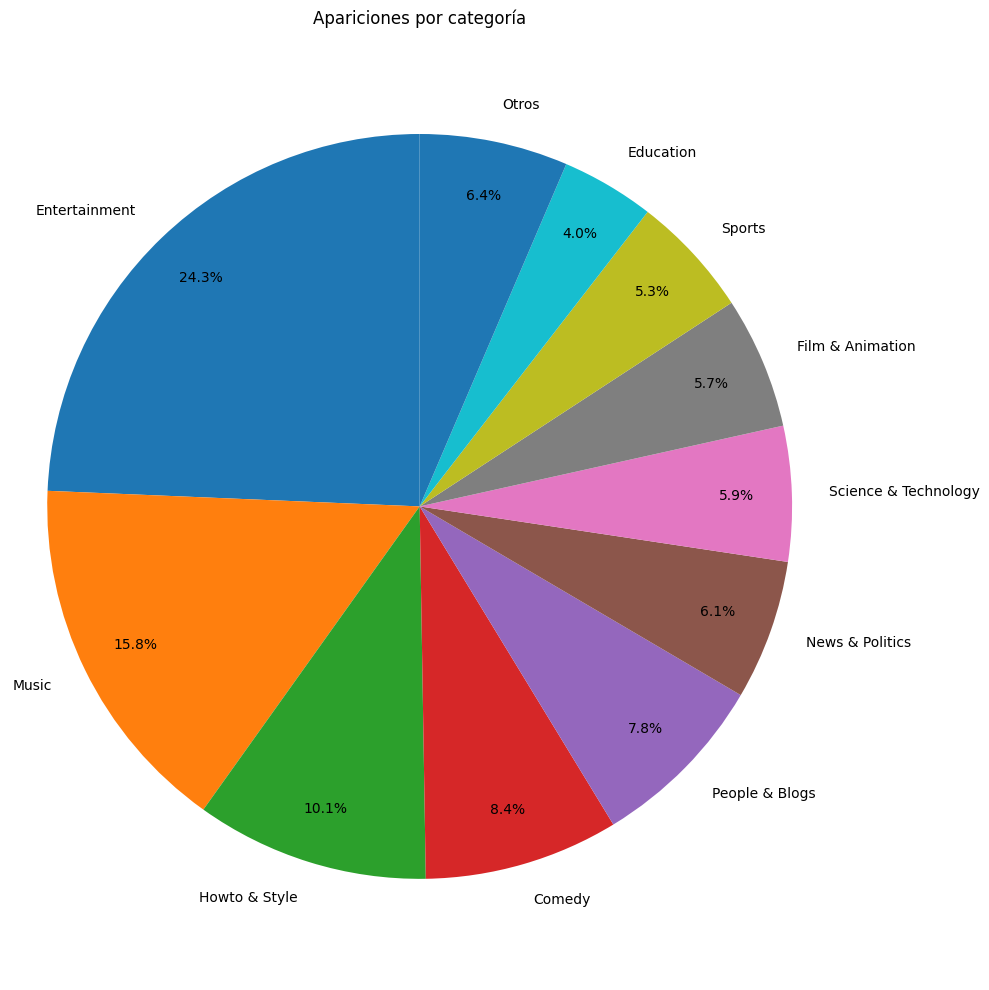

In [ ]:
# @title
import matplotlib.pyplot as plt

# Calculate the frequency of each category_id
category_counts = df['category_id'].value_counts()

# Sort in descending order and get the top 10
top_10_categories = category_counts.head(10)

# Sum the counts of the remaining categories into 'Otros'
other_categories_count = category_counts.iloc[10:].sum()

# Create a new Series for plotting, including 'Otros'
pie_data = pd.concat([top_10_categories, pd.Series({'Otros': other_categories_count})])

# Map category IDs to names for the top 10 categories, keeping 'Otros' as is
labels = [category_id_to_name.get(cid, str(cid)) for cid in top_10_categories.index.tolist()] + ['Otros']

# Create the pie chart
plt.figure(figsize=(10, 10))
plt.pie(pie_data, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.85)
plt.title('Apariciones por categoría')
plt.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()
plt.show()

Con esto vemos como en 2018 no sólo el entretenimiento y la música que son los reyes esperados de la popularidad para este estudio, sino también videos tutoriales de estilo de vida tuvieron una alta prominencia. Agrupando los blogs con los estilos de vida y tutoriales tenemos casi un 20% de los videos en trending. El resto de la tarta se reparte en las otras categorías. Vale mencionar que aunque la categoría con id 43 identifica a los trailers, muchos trailers no necesariamente son catalogados así. Si analizamos el caso del trailer de Avengers Infinity War, este fue catalogado como entretenimiento (category_id: 24):

In [ ]:
# @title
video_id_to_find = '6ZfuNTqbHE8'
first_entry = df[df['video_id'] == video_id_to_find].iloc[0]
print(first_entry)

video_id                                                        6ZfuNTqbHE8
trending_date                                                      17.30.11
title                     Marvel Studios' Avengers: Infinity War Officia...
channel_title                                          Marvel Entertainment
category_id                                                              24
publish_time                                       2017-11-29T13:26:24.000Z
tags                      marvel|"comics"|"comic books"|"nerdy"|"geeky"|...
views                                                              37736281
likes                                                               1735895
dislikes                                                              21969
comment_count                                                        241237
thumbnail_link               https://i.ytimg.com/vi/6ZfuNTqbHE8/default.jpg
comments_disabled                                                     False
ratings_disa

## Evolución de los videos

Nos intriga ver cuáles son aquellos videos que protagonizan la lista de trends. Revisemos los 20 videos más vistos y su evolución dentro del repositorio.

In [ ]:
# @title
# Sort by views in descending order and drop duplicates based on video_id to get the highest view count for each unique video
df_unique_videos_by_views = df.sort_values(by='views', ascending=False).drop_duplicates(subset=['video_id'])

# Get the top 10 most viewed unique videos
top_10_most_viewed = df_unique_videos_by_views.head(20)

# Display the relevant columns for the top 10 videos
display(top_10_most_viewed[['title', 'channel_title', 'views', 'likes', 'dislikes', 'comment_count']])

,title,channel_title,views,likes,dislikes,comment_count
38547,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,225211923,5023450,343541,517232
6181,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,149376127,3093544,1643059,810698
34708,Ariana Grande - No Tears Left To Cry,ArianaGrandeVevo,148689896,3094021,129502,242039
34888,"Becky G, Natti Natasha - Sin Pijama (Official ...",BeckyGVEVO,139334502,1425496,119798,83941
38273,BTS (방탄소년단) 'FAKE LOVE' Official MV,ibighit,123010920,5613827,206892,1228655
34747,The Weeknd - Call Out My Name (Official Video),TheWeekndVEVO,122544931,1427436,40837,55320
2587,"Luis Fonsi, Demi Lovato - Échame La Culpa",LuisFonsiVEVO,102012605,2376636,117196,134224
40869,"Cardi B, Bad Bunny & J Balvin - I Like It [Off...",Cardi B,94254507,1816753,102474,101077
4997,Marvel Studios' Avengers: Infinity War Officia...,Marvel Entertainment,91933007,2625661,53709,350458
25947,Maluma - El Préstamo (Official Video),MalumaVEVO,87264467,815369,71494,35945


###Vistas

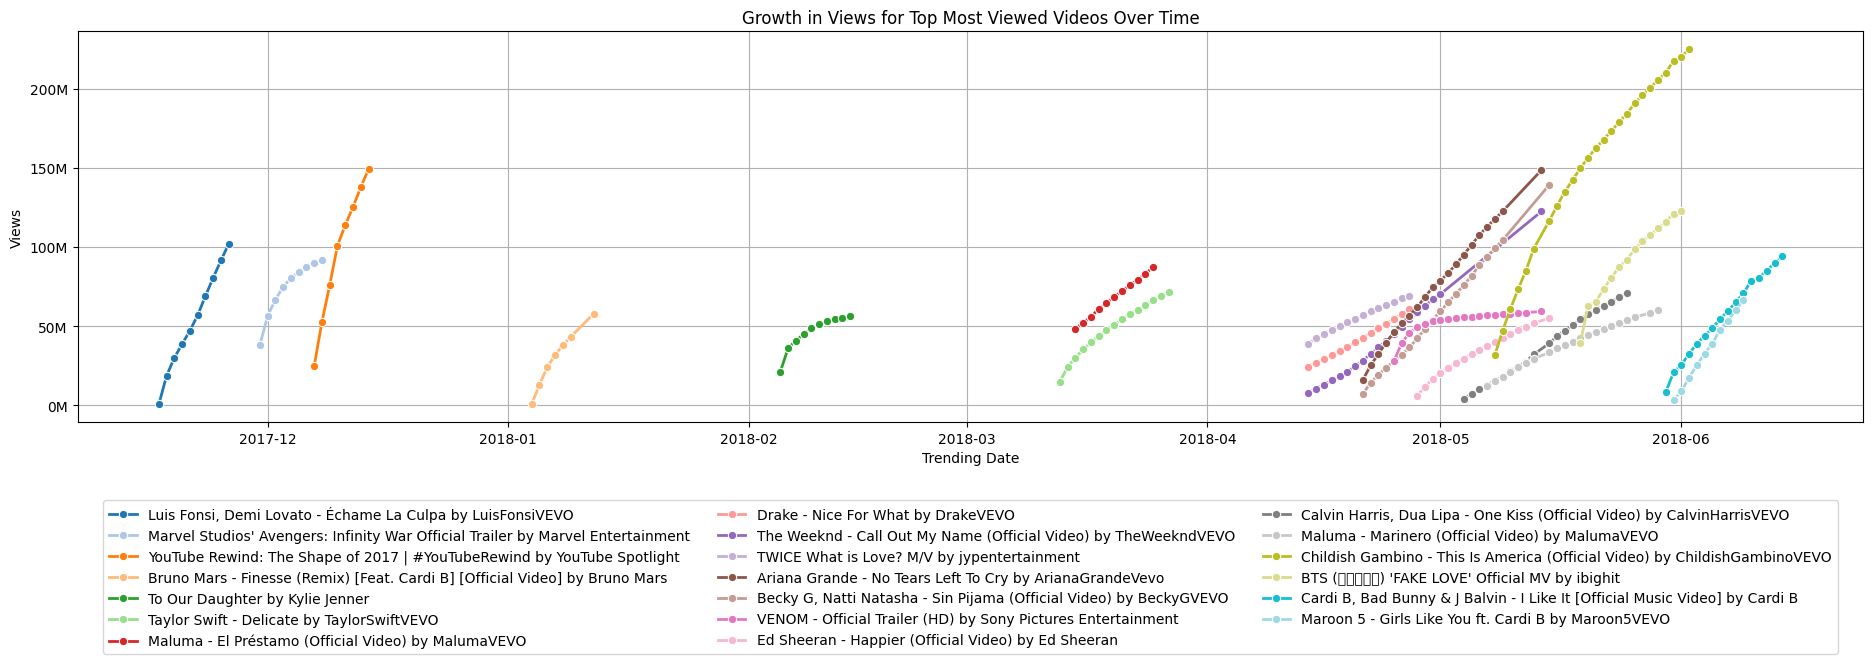

In [ ]:
# @title
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mticker
import pandas as pd
import warnings

warnings.filterwarnings('ignore')

# Define the formatter for millions on the y-axis
def millions_formatter(x, pos):
    return f'{x/1_000_000:.0f}M'

# Create an empty list to store data for all top videos
all_top_videos_df = pd.DataFrame()

# Iterate through each of the top_10_most_viewed videos to gather their trending data
for index, row in top_10_most_viewed.iterrows():
    video_id = row['video_id']
    video_title = row['title']
    video_channel = row['channel_title']

    # Filter the main DataFrame for the specific video ID
    video_data = df[df['video_id'] == video_id].copy()

    # Add a column for the video title to be used for hue in the plot
    video_data['full_title'] = f"{video_title} by {video_channel}"

    # Convert 'trending_date' to datetime objects if not already converted
    video_data['trending_date'] = pd.to_datetime(video_data['trending_date'], format='%y.%d.%m')

    # Append to the combined DataFrame
    all_top_videos_df = pd.concat([all_top_videos_df, video_data])

# Sort the combined DataFrame by trending_date for proper line plotting
all_top_videos_df = all_top_videos_df.sort_values(by='trending_date')

# Plotting the growth in views for all videos on a single graph
plt.figure(figsize=(20, 8)) # Increased width from 15 to 20
sns.lineplot(x='trending_date', y='views', hue='full_title', data=all_top_videos_df, marker='o', linewidth=2, palette='tab20')
plt.title('Growth in Views for Top Most Viewed Videos Over Time')
plt.xlabel('Trending Date')
plt.ylabel('Views')
plt.grid(True)

# Apply the millions formatter to the y-axis
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(millions_formatter))

# Place legend below the plot
plt.legend(bbox_to_anchor=(0.5, -0.2), loc='upper center', borderaxespad=0., ncol=3) # Adjusted for placement below
plt.tight_layout(rect=[0, 0.1, 1, 1]) # Adjust layout to make space for the legend below
plt.show()

De aquí podemos resaltar al video de Childish Gambino con el pico máximo de 2018, pero también al crecimiento casi vertical acompañado de una corta vida que tuvo el Youtube Rewind de 2017. En este, el crecimiento no fue pausado y continuo como el caso de la mayoría de videos musicales que son vistos a través del tiempo, sino explosivo por una masa crítica de personas que lo vieron al momento de su salida y lo dejaron atrás al poco tiempo pues desapareció de las listas de trending.

### Likes y Dislikes
Analicemos el caso particular del Youtube Rewind de 2017, un evento infame en la historia de la plataforma

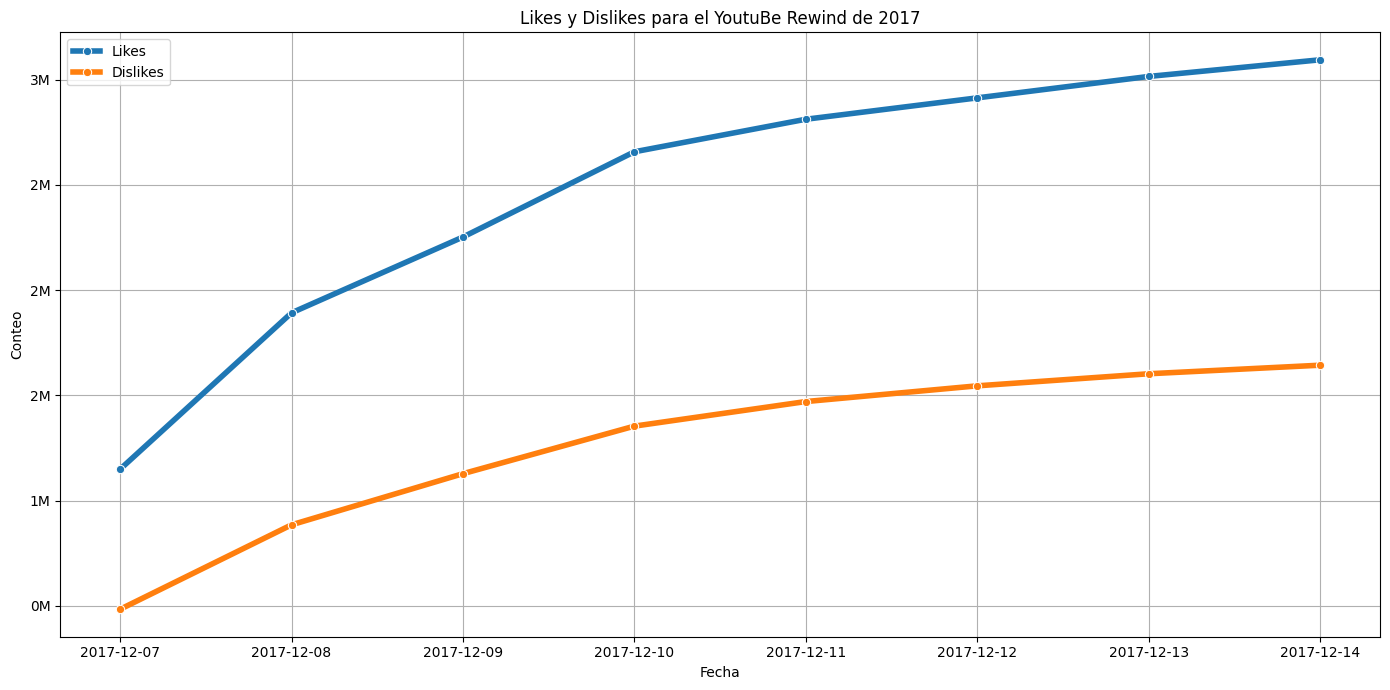

In [ ]:
# @title
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mticker
import pandas as pd

def millions_formatter(x, pos):
    return f'{x/1_000_000:.0f}M'

video_id_to_plot = 'FlsCjmMhFmw'

# Filter data for the specific video
video_data = df[df['video_id'] == video_id_to_plot].copy()

# Convert 'trending_date' to datetime objects
video_data['trending_date'] = pd.to_datetime(video_data['trending_date'], format='%y.%d.%m')

# Sort by trending_date to ensure correct line plotting
video_data = video_data.sort_values(by='trending_date')

plt.figure(figsize=(14, 7))

sns.lineplot(x='trending_date', y='likes', data=video_data, marker='o', label='Likes', linewidth=4)
sns.lineplot(x='trending_date', y='dislikes', data=video_data, marker='o', label='Dislikes', linewidth=4)

plt.title(f'Likes y Dislikes para el YoutuBe Rewind de 2017')
plt.ylabel('Conteo')
plt.xlabel('Fecha')
plt.grid(True)
plt.legend()

# Apply the millions formatter to the y-axis
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(millions_formatter))

plt.tight_layout()
plt.show()

Las razones de su vida tan corta dentro de la lista de videos trending es clara, la recepción del video fue ampliamente negativa. Por su lado, haciendo la misma comparación con el video de Childish Gambino:



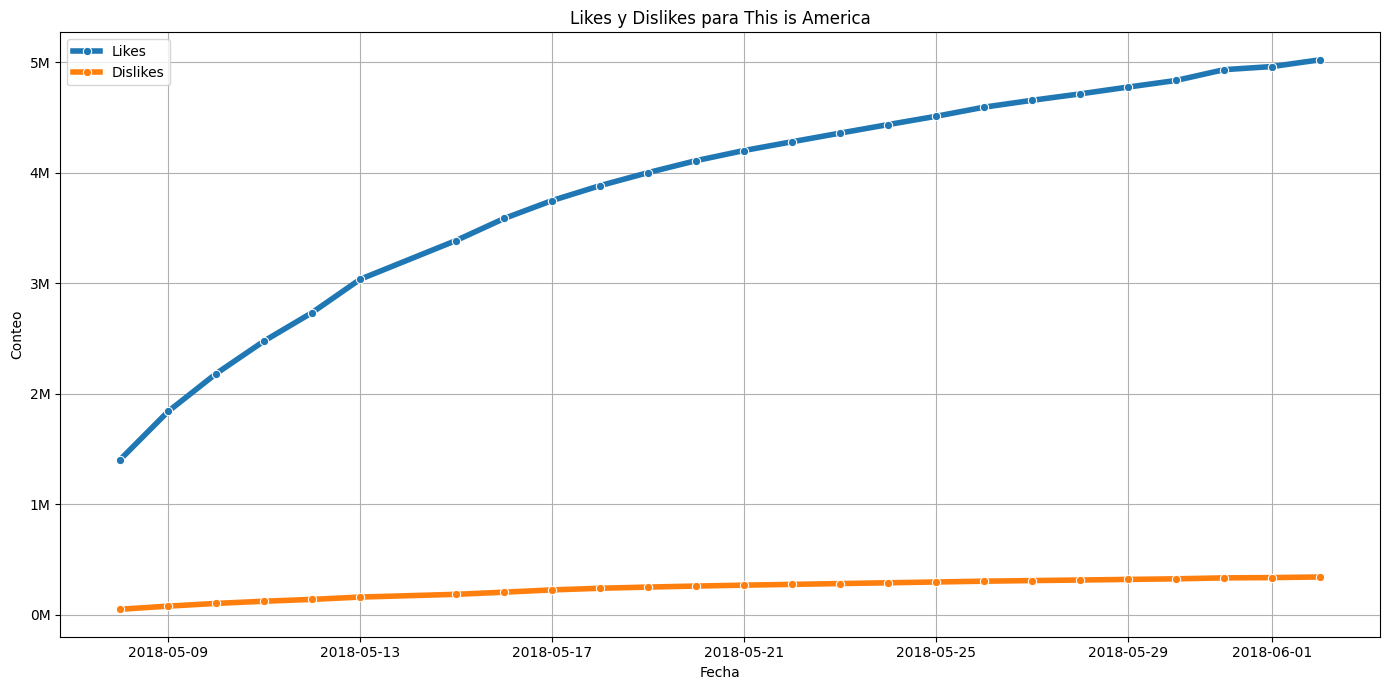

In [ ]:
# @title
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mticker
import pandas as pd

def millions_formatter(x, pos):
    return f'{x/1_000_000:.0f}M'

video_id_to_plot = 'VYOjWnS4cMY'

# Filter data for the specific video
video_data = df[df['video_id'] == video_id_to_plot].copy()

# Convert 'trending_date' to datetime objects
video_data['trending_date'] = pd.to_datetime(video_data['trending_date'], format='%y.%d.%m')

# Sort by trending_date to ensure correct line plotting
video_data = video_data.sort_values(by='trending_date')

plt.figure(figsize=(14, 7))

sns.lineplot(x='trending_date', y='likes', data=video_data, marker='o', label='Likes', linewidth=4)
sns.lineplot(x='trending_date', y='dislikes', data=video_data, marker='o', label='Dislikes', linewidth=4)

plt.title(f'Likes y Dislikes para This is America')
plt.ylabel('Conteo')
plt.xlabel('Fecha')
plt.grid(True)
plt.legend()

# Apply the millions formatter to the y-axis
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(millions_formatter))

plt.tight_layout()
plt.show()

Sí, la diferencia es abismal. El Video de Gambino tuvo una recepción extremadamente positiva y un crecimiento continuo. Cuando relacionamos el número de dislikes de un video con sus likes, tenemos una métrica ingeniosa para encontrar aquellos videos trending por su impacto negativo. Veamos aquellos videos con un número significativo de visualizaciones, aquellas que se posicionen por encima del promedio de vistas del repositorio (74Mil):

In [ ]:
# @title
# Ensure 'trending_date' is in datetime format first for accurate 'latest' identification
df['trending_date'] = pd.to_datetime(df['trending_date'], format='%y.%d.%m')

# Sort by video_id and then by trending_date to easily get the latest instance
df_sorted_by_date = df.sort_values(by=['video_id', 'trending_date'], ascending=True)

# Drop duplicates, keeping the last occurrence (which will be the latest for each video_id)
df_unique_latest = df_sorted_by_date.drop_duplicates(subset=['video_id'], keep='last')

# Filter out videos with 0 dislikes to avoid division by zero and to focus on videos with actual negative engagement
df_filtered_for_ratio = df_unique_latest[df_unique_latest['dislikes'] > 0].copy()
# Filter out videos with less that the threshold for views (74.000)
df_filtered_for_ratio = df_unique_latest[df_unique_latest['views'] > 74000].copy()

# Calculate the likes to dislikes ratio. A lower ratio means more dislikes relative to likes.
df_filtered_for_ratio['likes_dislikes_ratio'] = df_filtered_for_ratio['likes'] / df_filtered_for_ratio['dislikes']

# Sort by the calculated ratio in ascending order to find the 'most hated' videos
most_hated_videos = df_filtered_for_ratio.sort_values(by='likes_dislikes_ratio', ascending=True)

display(most_hated_videos[['title', 'channel_title', 'views', 'likes', 'dislikes', 'likes_dislikes_ratio']].head(20))

,title,channel_title,views,likes,dislikes,likes_dislikes_ratio
7594,PSA from Chairman of the FCC Ajit Pai,Daily Caller,1205682,9572,228426,0.041904
6856,The FCC repeals its net neutrality rules,Washington Post,1263104,5930,132439,0.044775
15584,LuLaRoe Consultant Mocks Those With Special Needs,J S,229332,30,629,0.047695
7595,Judge Roy Moore Campaign Statement,Roy Moore for Senate,789818,4329,59157,0.073178
7170,Roy Moore Delivers Concession Speech From Alab...,NBC News,201025,625,4786,0.130589
15425,Grammys 2018: Hillary Clinton surprises crowd ...,CBS News,467531,4028,20385,0.197596
1757,Terry Crews Says He Was Sexually Assaulted,Wendy Williams,451381,3110,14575,0.213379
9597,House Speaker Paul Ryan: ‘Don’t Forget This Is...,TODAY,290706,1882,7859,0.239471
15772,Chloe Grace Moretz on Louis C.K. and the #MeTo...,Variety,376194,1357,5089,0.266654
18962,I Feel Pretty Trailer #1 | Movieclips Trailers,Movieclips Trailers,1071466,10749,38082,0.282259


## Outliers

Para finalizar, analicemos a los valores extremos de las variables más significativas: vistas, likes y dislikes

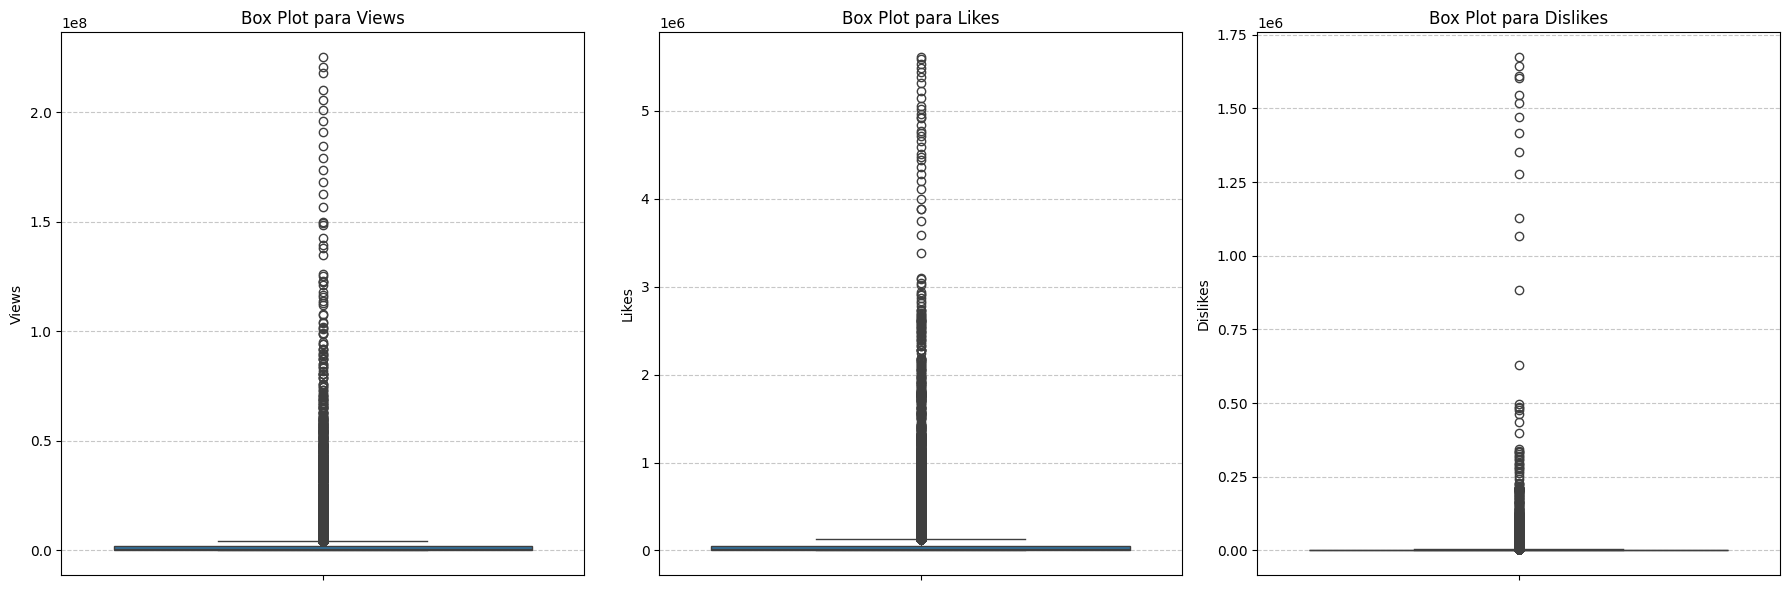

In [ ]:
# @title
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

# Define the columns for which to generate box plots
columns_to_plot = ['views', 'likes', 'dislikes']

plt.figure(figsize=(18, 6)) # Adjust figure size as needed

for i, col in enumerate(columns_to_plot):
    plt.subplot(1, len(columns_to_plot), i + 1) # Create subplots for each column
    sns.boxplot(y=df[col])
    plt.title(f'Box Plot para {col.capitalize()}')
    plt.ylabel(col.capitalize())
    plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

La varianza dentro de cada una de estas variables es tan elevada, que existe un número altísimo de outliers que escapan a los cuantiles típicos. El listado de videos trending the YouTube no es homogéneo ni se rige por normas estrictas sobre las métricas de visualización dándonos conjuntos de datos extremadamente diversos pero que al hacernos preguntas concretas (Como fue el caso de la sección anterior) nos permiten observar un conjunto aunque relativamente pequeño, sobre qué ocupaba las pantañas del público durante 2017 y 2018.